<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Convert YearsCodePro to numeric first
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
# Display basic information
print("Dataset shape:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe(include='all'))

Dataset shape: (65437, 114)

Column names:
 ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWo

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [6]:
# First convert YearsCodePro to numeric properly
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Now handle missing values
df = df.fillna({
    'Employment': 'Unknown',
    'JobSat': df['JobSat'].mode()[0],
    'RemoteWork': 'Not specified',
    'YearsCodePro': df['YearsCodePro'].median()  # Now this will work
})

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork                 0
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                     0
Length: 114, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [7]:
# Analyze key columns
print("\nEmployment distribution:")
print(df['Employment'].value_counts(normalize=True))

print("\nJob Satisfaction distribution:")
print(df['JobSat'].value_counts(normalize=True))

# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
print("\nProfessional Coding Experience summary:")
print(df['YearsCodePro'].describe())


Employment distribution:
Employment
Employed, full-time                                                                                                                                   0.596620
Independent contractor, freelancer, or self-employed                                                                                                  0.074056
Student, full-time                                                                                                                                    0.071962
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              0.054358
Not employed, but looking for work                                                                                                                    0.035775
                                                                                                                                                        ...   
Not emplo

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


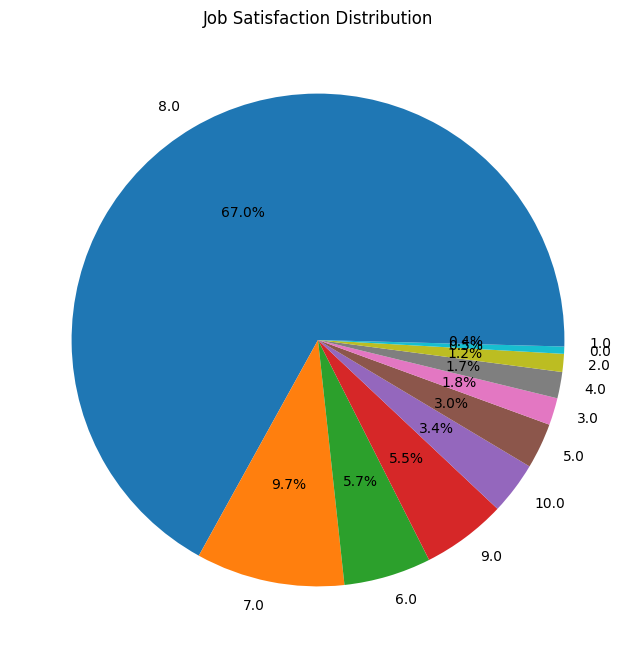

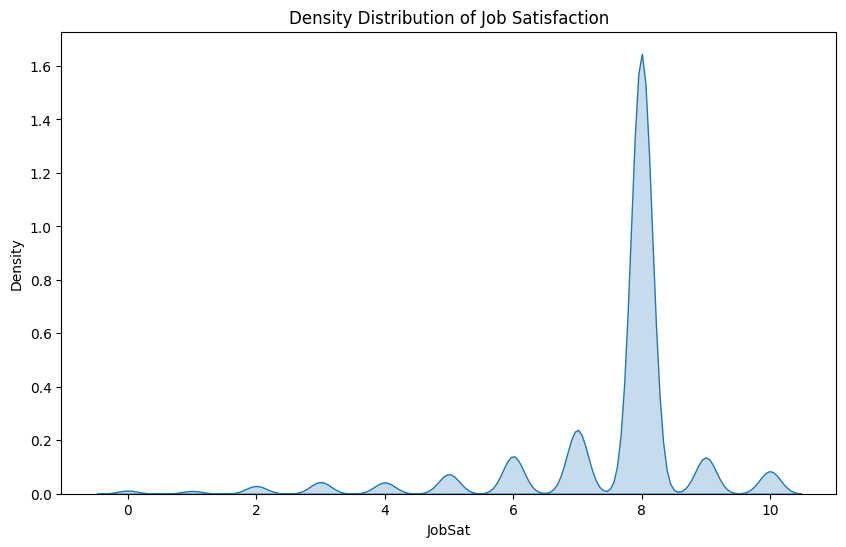

In [8]:
# Pie chart of JobSat
plt.figure(figsize=(8, 8))
df['JobSat'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Job Satisfaction Distribution')
plt.ylabel('')
plt.show()

# KDE plot alternative
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='JobSat', fill=True)
plt.title('Density Distribution of Job Satisfaction')
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


<Figure size 1200x600 with 0 Axes>

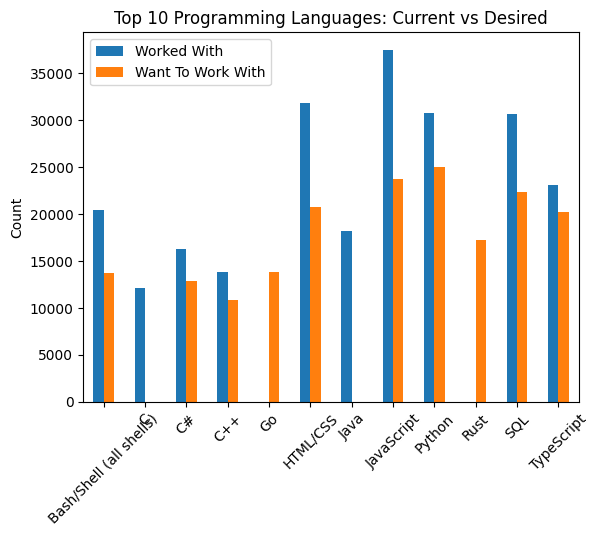

In [9]:
# Assuming languages are semicolon-separated
languages_worked = df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts().head(10)
languages_want = df['LanguageWantToWorkWith'].str.split(';').explode().value_counts().head(10)

# Grouped bar chart
plt.figure(figsize=(12, 6))
pd.DataFrame({
    'Worked With': languages_worked,
    'Want To Work With': languages_want
}).plot.bar()
plt.title('Top 10 Programming Languages: Current vs Desired')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


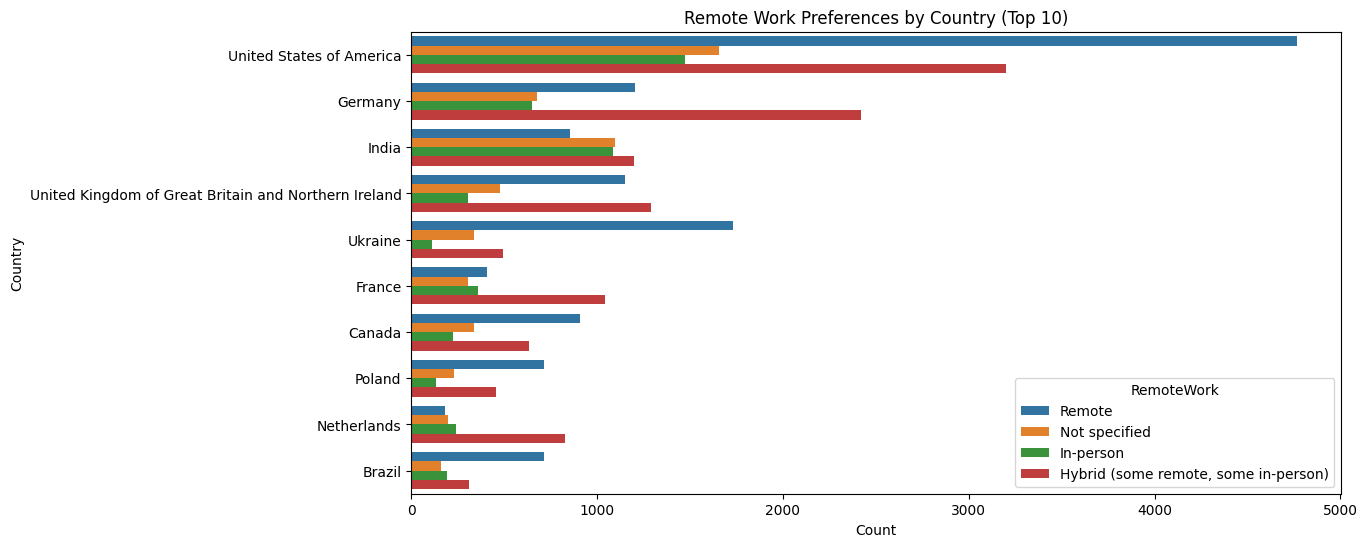

In [10]:
# Grouped bar chart by region (assuming Country column exists)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Country', hue='RemoteWork', 
             order=df['Country'].value_counts().iloc[:10].index)
plt.title('Remote Work Preferences by Country (Top 10)')
plt.xlabel('Count')
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.



Correlation between Job Satisfaction and Experience:
              JobSatScore  YearsCodePro
JobSatScore           NaN           NaN
YearsCodePro          NaN           1.0


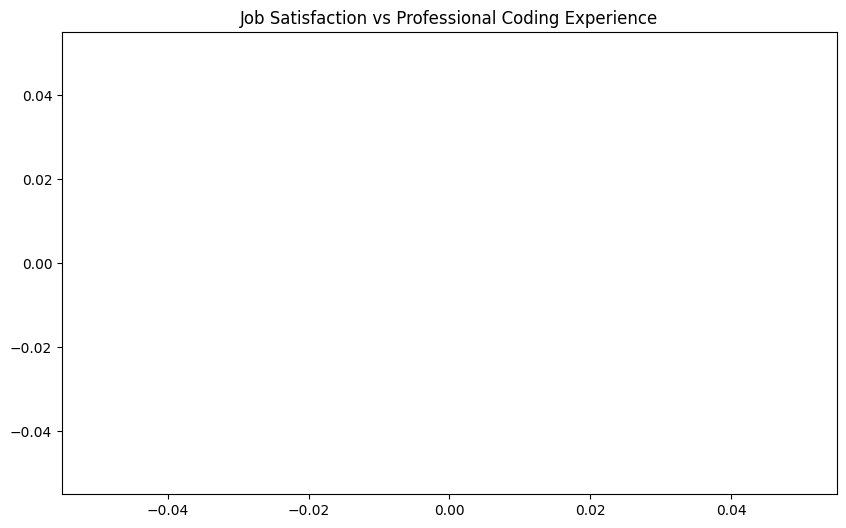

In [11]:
# Convert JobSat to numeric scale if needed (example mapping)
job_sat_map = {'Very dissatisfied': 1, 'Slightly dissatisfied': 2, 
               'Neutral': 3, 'Slightly satisfied': 4, 'Very satisfied': 5}
df['JobSatScore'] = df['JobSat'].map(job_sat_map)

# Calculate correlation
corr = df[['JobSatScore', 'YearsCodePro']].corr(method='spearman')
print("\nCorrelation between Job Satisfaction and Experience:")
print(corr)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatScore', alpha=0.5)
plt.title('Job Satisfaction vs Professional Coding Experience')
plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [ ]:
## Write your code here

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
